# <center> Overfitting </center>




In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import *
from tensorflow.keras.utils import *
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


import numpy as np
old = np.load

np.load = lambda *a,**k: old(*a, **k)

In [2]:


max_features = 10000 # Número máximo de palabras diferentes de nuestro vocabulario.
maxlen = 300         # Número máximo de palabras en cada texto.

# Carga el texto ya tokenizado.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) 

# Preprocesado de los textos para igualar todas sus longitudes.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test =  preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) 

# Utiliza esta línea para obtener la palabra asociada a cada índice.
# imdb.get_word_index()

Epoch 1/10
10/10 [==============================] - 5s 523ms/step - loss: 0.6941 - accuracy: 0.5063 - val_loss: 0.6926 - val_accuracy: 0.5056
Epoch 2/10
10/10 [==============================] - 5s 503ms/step - loss: 0.6949 - accuracy: 0.4750 - val_loss: 0.6901 - val_accuracy: 0.5206
Epoch 3/10
10/10 [==============================] - 5s 485ms/step - loss: 0.6834 - accuracy: 0.5406 - val_loss: 0.6885 - val_accuracy: 0.5076
Epoch 4/10
10/10 [==============================] - 5s 462ms/step - loss: 0.6875 - accuracy: 0.5406 - val_loss: 0.6845 - val_accuracy: 0.5005
Epoch 5/10
10/10 [==============================] - 5s 502ms/step - loss: 0.6609 - accuracy: 0.6125 - val_loss: 0.6282 - val_accuracy: 0.7106
Epoch 6/10
10/10 [==============================] - 5s 490ms/step - loss: 0.6082 - accuracy: 0.7094 - val_loss: 0.5559 - val_accuracy: 0.7259
Epoch 7/10
10/10 [==============================] - 5s 484ms/step - loss: 0.5028 - accuracy: 0.7594 - val_loss: 0.4770 - val_accuracy: 0.7792
Epoch 

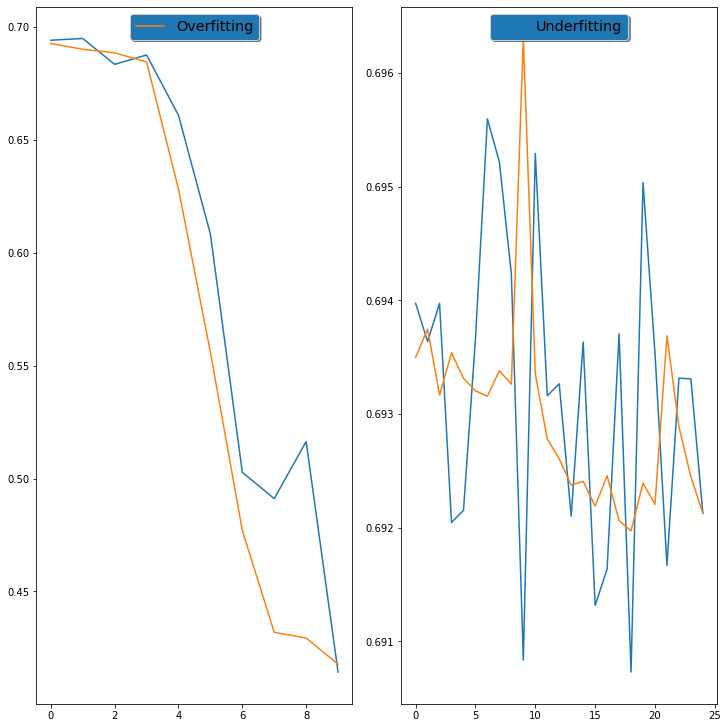

In [5]:
epoc = np.arange(10)


model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test), batch_size=32,steps_per_epoch=10)

fig2 = plt.figure(figsize=(10,10),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])


lossTrain = history.history['loss']
lossValidation = history.history['val_loss']


f2_ax1.plot(epoc, lossTrain)
f2_ax1.plot(epoc, lossValidation, label='Overfitting')

legend = f2_ax1.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')


model = Sequential()

model.add(Embedding(max_features,20, input_length= maxlen, trainable = False))
model.add(LSTM(20, return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=25, validation_data=(x_test,y_test),steps_per_epoch= 10, batch_size = 32)


lossTrain = history.history['loss']
lossValidation = history.history['val_loss']

epoc = np.arange(25)

f2_ax2.plot(epoc, lossTrain, label='Underfitting')

f2_ax2.plot(epoc, lossValidation)

legend = f2_ax2.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')


In [6]:
callback = tf.keras.callbacks.EarlyStopping(patience=3)

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test),callbacks= [callback],steps_per_epoch= 10, batch_size = 32)


Epoch 1/10
10/10 [==============================] - 5s 524ms/step - loss: 0.6957 - accuracy: 0.4969 - val_loss: 0.6930 - val_accuracy: 0.5064
Epoch 2/10
10/10 [==============================] - 5s 505ms/step - loss: 0.6941 - accuracy: 0.4969 - val_loss: 0.6922 - val_accuracy: 0.5018
Epoch 3/10
10/10 [==============================] - 5s 478ms/step - loss: 0.6862 - accuracy: 0.5594 - val_loss: 0.6927 - val_accuracy: 0.5319
Epoch 4/10
10/10 [==============================] - 5s 487ms/step - loss: 0.6751 - accuracy: 0.5813 - val_loss: 0.6596 - val_accuracy: 0.6569
Epoch 5/10
10/10 [==============================] - 5s 497ms/step - loss: 0.6233 - accuracy: 0.6969 - val_loss: 0.5703 - val_accuracy: 0.7065
Epoch 6/10
10/10 [==============================] - 5s 493ms/step - loss: 0.6060 - accuracy: 0.6812 - val_loss: 0.5333 - val_accuracy: 0.7350
Epoch 7/10
10/10 [==============================] - 5s 496ms/step - loss: 0.5869 - accuracy: 0.6781 - val_loss: 0.5893 - val_accuracy: 0.6784
Epoch 

In [7]:
x_trainP = x_train[0:2000,:]
x_testP  = x_test[0:2000, :]
y_trainP = y_train[0:2000]
y_testP  = y_test[0:2000]

Epoch 1/10
10/10 [==============================] - 1s 88ms/step - loss: 0.6941 - accuracy: 0.4500 - val_loss: 0.6923 - val_accuracy: 0.5225
Epoch 2/10
10/10 [==============================] - 1s 52ms/step - loss: 0.6940 - accuracy: 0.4812 - val_loss: 0.6947 - val_accuracy: 0.4800
Epoch 3/10
10/10 [==============================] - 1s 56ms/step - loss: 0.6941 - accuracy: 0.4688 - val_loss: 0.6908 - val_accuracy: 0.5230
Epoch 4/10
10/10 [==============================] - 1s 56ms/step - loss: 0.6886 - accuracy: 0.5531 - val_loss: 0.6894 - val_accuracy: 0.5440
Epoch 5/10
10/10 [==============================] - 1s 55ms/step - loss: 0.6796 - accuracy: 0.5938 - val_loss: 0.6854 - val_accuracy: 0.5610
Epoch 6/10
10/10 [==============================] - 1s 55ms/step - loss: 0.6505 - accuracy: 0.6156 - val_loss: 0.6756 - val_accuracy: 0.5550
Epoch 7/10
10/10 [==============================] - 1s 56ms/step - loss: 0.6006 - accuracy: 0.6776 - val_loss: 0.5748 - val_accuracy: 0.7090
Epoch 8/10
10

Epoch 9/10
10/10 [==============================] - 1s 53ms/step - loss: 0.7304 - accuracy: 0.5562 - val_loss: 0.7319 - val_accuracy: 0.4765
Epoch 10/10
10/10 [==============================] - 0s 48ms/step - loss: 0.7293 - accuracy: 0.5312 - val_loss: 0.7306 - val_accuracy: 0.4765
Epoch 1/10
10/10 [==============================] - 1s 92ms/step - loss: 5.7011 - accuracy: 0.4563 - val_loss: 3.4980 - val_accuracy: 0.5080
Epoch 2/10
10/10 [==============================] - 1s 55ms/step - loss: 2.4095 - accuracy: 0.4406 - val_loss: 1.4926 - val_accuracy: 0.5235
Epoch 3/10
10/10 [==============================] - 1s 54ms/step - loss: 1.3490 - accuracy: 0.4656 - val_loss: 1.2417 - val_accuracy: 0.4790
Epoch 4/10
10/10 [==============================] - 1s 54ms/step - loss: 1.0662 - accuracy: 0.5031 - val_loss: 0.9503 - val_accuracy: 0.5215
Epoch 5/10
10/10 [==============================] - 0s 50ms/step - loss: 0.8989 - accuracy: 0.4594 - val_loss: 0.8443 - val_accuracy: 0.4860
Epoch 6/10
1

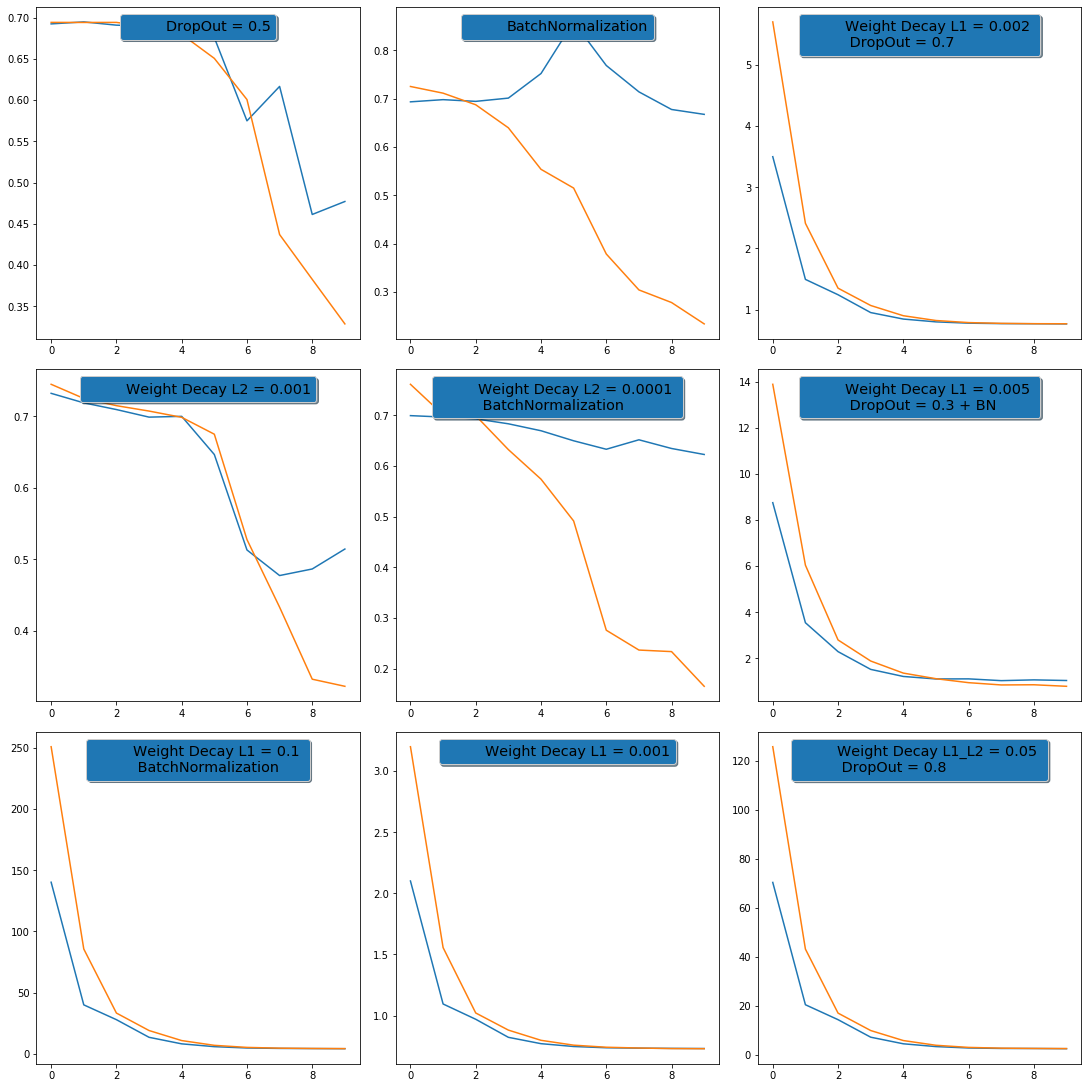

In [8]:
epoc = np.arange(10)
fig2 = plt.figure(figsize=(15,15),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])
f2_ax5 = fig2.add_subplot(spec2[2, 0])
f2_ax6 = fig2.add_subplot(spec2[2, 1])
f2_ax7 = fig2.add_subplot(spec2[0, 2])
f2_ax8 = fig2.add_subplot(spec2[1, 2])
f2_ax9 = fig2.add_subplot(spec2[2, 2])

## 1

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(30,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax1.plot(epoc, lossValidation, label='DropOut = 0.5')
f2_ax1.plot(epoc, lossTrain)

legend = f2_ax1.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')




## 2

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax2.plot(epoc, lossValidation, label='BatchNormalization')
f2_ax2.plot(epoc, lossTrain)

legend = f2_ax2.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')




## 3

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax3.plot(epoc, lossValidation, label='Weight Decay L2 = 0.001')
f2_ax3.plot(epoc, lossTrain)

legend = f2_ax3.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')




## 4

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax4.plot(epoc, lossValidation, label='Weight Decay L2 = 0.0001 \n BatchNormalization')
f2_ax4.plot(epoc, lossTrain)

legend = f2_ax4.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')





## 5

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.1)))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax5.plot(epoc, lossValidation, label='Weight Decay L1 = 0.1 \n BatchNormalization')
f2_ax5.plot(epoc, lossTrain)

legend = f2_ax5.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')





## 6

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax6.plot(epoc, lossValidation, label='Weight Decay L1 = 0.001')
f2_ax6.plot(epoc, lossTrain)

legend = f2_ax6.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')





## 7

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.002)))
model.add(Dropout(0.7))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax7.plot(epoc, lossValidation, label='Weight Decay L1 = 0.002 \n DropOut = 0.7')
f2_ax7.plot(epoc, lossTrain)

legend = f2_ax7.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')



## 8

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax8.plot(epoc, lossValidation, label='Weight Decay L1 = 0.005 \n DropOut = 0.3 + BN')
f2_ax8.plot(epoc, lossTrain)

legend = f2_ax8.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')




## 9

model = Sequential()

model.add(Embedding(max_features,32, input_length= maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(30,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.05)))
model.add(Dropout(0.8))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x_trainP,y_trainP,epochs=10, validation_data=(x_testP,y_testP), batch_size=32,steps_per_epoch=10)
lossValidation = history.history['val_loss']
lossTrain = history.history['loss']

f2_ax9.plot(epoc, lossValidation, label='Weight Decay L1_L2 = 0.05 \n DropOut = 0.8')
f2_ax9.plot(epoc, lossTrain)

legend = f2_ax9.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')



